<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/Laba_mashin_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Модели регрессии**

**Выполнила:** Смирнова П.М.

**Группа:** БИВТ-22-СП-4

**Цель работы**

Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.

**Задания для выполнения**

1. Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.
2. Постройте модель регрессии для предсказания цены конкретного объекта.
3. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

Импортируем нужные библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Сперва загружаем исходный набор данных

In [ ]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Особый интерес здесь представляют поля data и target, которые содержат именно исходные атрибуты и вектор значений целевой переменной. Выведем их тип

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

Это специальный тип данных библиотеки sklearn, который похож по своему устройству на обычный словарь. Поэтому посмотрим, какие ключи есть в этом словаре

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
california.data.shape

(20640, 8)

Теперь с данными можно работать разными способами. Для удобства анализа мы объединим все массивы в датафрейм

In [ ]:
data = pd.DataFrame(california.data, columns=california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Метод в библиотеке Pandas, который возвращает последние строки DataFrame или Series. По умолчанию он показывает 5 последних строк.

In [ ]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


Проверим данные на наличие пропущенных значений

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Выводим основную статистику по датасету

In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


Теперь выделим целевую переменную и факторы

In [ ]:
y = data.Price
X = data.drop('Price', axis=1)

In [ ]:
y.shape, X.shape

((20640,), (20640, 8))

Обучение и оценка качества модели

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
linear_score = model.score(X, y)
print(f"Коэффициент детерминации линейной модели: {linear_score:.4f}")

Коэффициент детерминации линейной модели: 0.6062


Коэффициенты модели, так как в линейных моделях они имеют некоторый смысл

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Выведем коэффициенты вместе с названиями соответствующих атрибутов

In [ ]:
_ = [print(k, v) for k, v in zip(california.feature_names, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


Как и в модели линейной регрессии, данный вектор не включает в себя свободный коэффициент. Он хранится в отдельном поле класса

In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


Сделаем предсказания модели и выведем на экран первые несколько точек

In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


Для сравнения выведем реальные соответствующие значения целевой переменной

In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


 График, демонстрирующий связь между реальными и предсказанными значениями целевой переменной

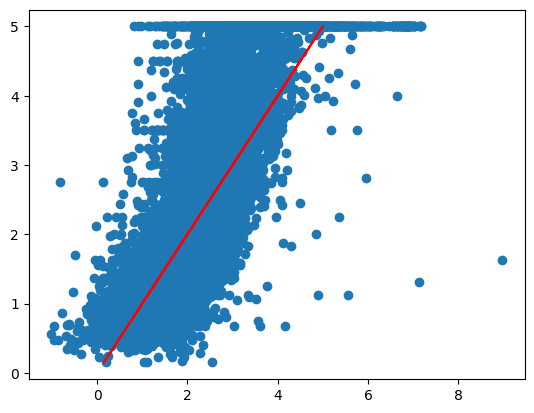

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

Уровень 0.6 показывает, что модель могла бы быть более точной

In [ ]:
model.score(X, y)

0.606232685199805

Введение полиномиальных признаков может существенно увеличить точность модели

In [ ]:
poly = PolynomialFeatures(5).fit_transform(X)

В данном случае используем полиномиальные признаки пятой степени

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

По этим данным можно построить график, подобный предыдущему

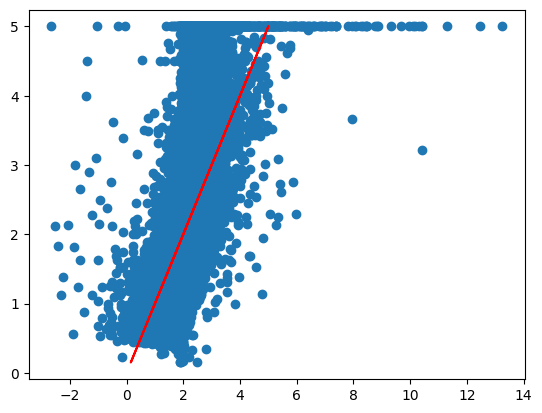

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
poly_score = polynomial.score(poly, y)
print(f"Коэффициент детерминации полиномиальной модели: {poly_score:.4f}")

Коэффициент детерминации полиномиальной модели: 0.3663


In [ ]:
print(f"Сравнение моделей:")
print(f"Линейная модель R^2: {linear_score:.4f}")
print(f"Полиномиальная модель R^2: {poly_score:.4f}")

Сравнение моделей:
Линейная модель R^2: 0.6062
Полиномиальная модель R^2: 0.3663


# **Задания для самостоятельной работы**

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
Метод опорных векторов
Без ядра
С гауссовым ядром
С полиномиальным ядром
Метод ближайших соседей
Многослойный перцептрон
Дерево решений
(*) Другие методы:
Гребневую регрессию
Регрессию Лассо
Регрессию ElasticNet
Случайный лес
Беггинг
Другие модели по желанию
3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

1. Загрузка данных и предварительный анализ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import r2_score

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target

print(data.info())
print(data.describe().round(2))

y = data.Price
X = data.drop('Price', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44 

2. Попробуйте применить к той же задаче другие модели регрессии

Исследование обученной модели (линейная регрессия)

Коэффициенты модели: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Интерсепт модели: -36.94192020718441
Коэффициент детерминации (R^2): 0.606232685199805


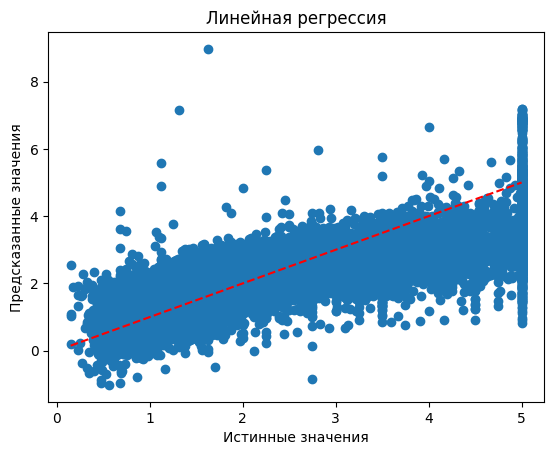

In [ ]:
model = LinearRegression()
model.fit(X, y)

print("Коэффициенты модели:", model.coef_)
print("Интерсепт модели:", model.intercept_)
print("Коэффициент детерминации (R^2):", model.score(X, y))

y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', linestyle='--')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Линейная регрессия")
plt.show()

Изменение аргументов модели и исследование их влияния

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
print("Ridge R^2:", ridge_model.score(X, y))

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X, y)
print("Lasso R^2:", lasso_model.score(X, y))

models = {
    "Linear Regression": model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model
}

for name, model in models.items():
    y_pred = model.predict(X)
    plt.scatter(y, y_pred, label=name)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', linestyle='--')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение моделей")
plt.legend()
plt.show()

Другие модели:

3. Функция для автоматического обучения и оценки моделей

In [ ]:
def train_and_evaluate_models(X, y, models):
    results = {}
    for name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        score = r2_score(y, y_pred)
        results[name] = score
        print(f"{name}: R^2 = {score:.4f}")

        plt.scatter(y, y_pred)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', linestyle='--')
        plt.xlabel("Истинные значения")
        plt.ylabel("Предсказанные значения")
        plt.title(name)
        plt.show()
    return results

results_california = train_and_evaluate_models(X, y, models)

4. Анализ другого набора данных (Diabetes)

In [ ]:
diabetes = load_diabetes()
data_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data_diabetes['Target'] = diabetes.target

y_diabetes = data_diabetes.Target
X_diabetes = data_diabetes.drop('Target', axis=1)

results_diabetes = train_and_evaluate_models(X_diabetes, y_diabetes, models)